TensorFlow Version: 2.19.0


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8538 - loss: 0.4805 - val_accuracy: 0.9636 - val_loss: 0.1239
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9570 - loss: 0.1415 - val_accuracy: 0.9718 - val_loss: 0.0972
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9687 - loss: 0.1018 - val_accuracy: 0.9725 - val_loss: 0.0916
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9730 - loss: 0.0832 - val_accuracy: 0.9731 - val_loss: 0.0932
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9771 - loss: 0.0732 - val_accuracy: 0.9701 - val_loss: 0.1030
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9806 - loss: 0.0618 - val_accuracy: 0.9756 - val_loss: 0.0881
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9803 - loss: 0.0597 - val_accuracy: 0.9764 - val_loss: 0.0928
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9841 - loss: 0.0511 -

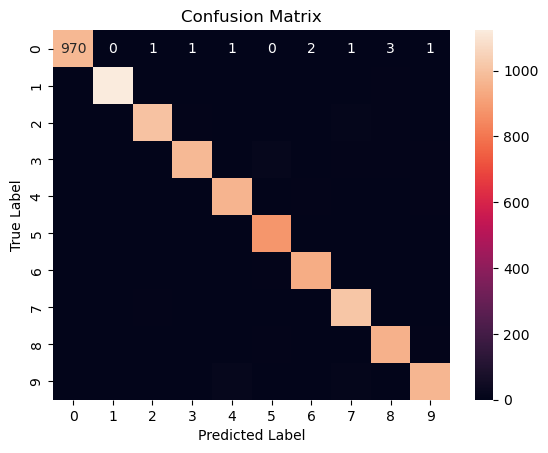

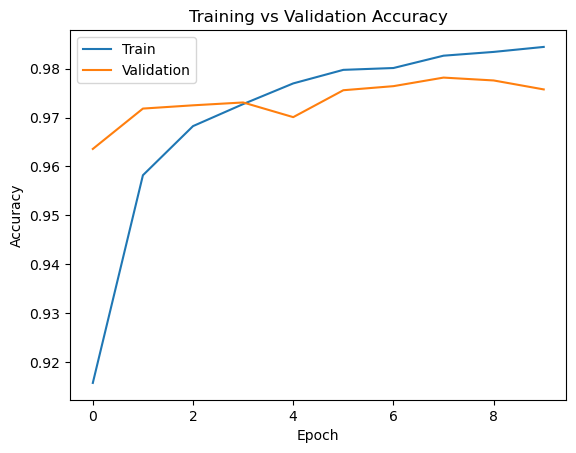


Model saved successfully as final_model_submission.h5

Project Completed & Ready for Submission.


In [1]:
# ======================================================
# Day 13 & Day 14 – Final Evaluation & Submission
# TensorFlow Image Classification Project
# ======================================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("TensorFlow Version:", tf.__version__)

# ======================================================
# Load Dataset
# ======================================================

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# ======================================================
# Build Final Optimized Model
# ======================================================

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ======================================================
# Train Model
# ======================================================

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2
)

# ======================================================
# Final Evaluation
# ======================================================

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("\nFinal Test Accuracy:", test_accuracy)
print("Final Test Loss:", test_loss)

# ======================================================
# Generate Predictions
# ======================================================

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# ======================================================
# Confusion Matrix
# ======================================================

cm = confusion_matrix(y_test, predicted_labels)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ======================================================
# Accuracy Graph
# ======================================================

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# ======================================================
# Save Final Model
# ======================================================

model.save("final_model_submission.h5")
print("\nModel saved successfully as final_model_submission.h5")

print("\nProject Completed & Ready for Submission.")
